<a href="https://colab.research.google.com/github/BitnooriLee/Applied-Machine-Learning/blob/main/assignment_1_DAT340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Programming assignment 1
Bitnoori Lee

Sena Bayraktaroglu

# Task 1: A classification example: fetal heart condition diagnosis

Step 1. Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root = '/content/gdrive/My Drive/DAT340/'

import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(root+"CTG.csv", skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

X.head() 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0


Step 2. Training the baseline classifier

In [ ]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain)



array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

Step 3. Trying out some different classifiers


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

DTC = DecisionTreeClassifier()
result = cross_val_score(DTC, Xtrain, Ytrain)
print("cross validation DecisionTreeClassifier",result)

RFC = RandomForestClassifier()
result =cross_val_score(RFC, Xtrain, Ytrain)
print("cross validation RandomForestClassifier ",result)

GBC = GradientBoostingClassifier()
result =cross_val_score(GBC, Xtrain, Ytrain)
print("cross validation GradientBoostingClassifier ",result)

cross validation DecisionTreeClassifier [0.90882353 0.93529412 0.91764706 0.90588235 0.94411765]
cross validation RandomForestClassifier  [0.92941176 0.95294118 0.92941176 0.93235294 0.95294118]
cross validation GradientBoostingClassifier  [0.94117647 0.96176471 0.94411765 0.94411765 0.95294118]


In [ ]:
# Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

prcptrn = Perceptron()
result =cross_val_score(prcptrn, Xtrain, Ytrain)
print("cross validation Perceptron ",result)

logReg = LogisticRegression(max_iter=20000)
result =cross_val_score(logReg, Xtrain, Ytrain)
print("cross validation LogisticRegression ",result)

LinearSvc = LinearSVC(max_iter=10000)
result =cross_val_score(LinearSvc, Xtrain, Ytrain)
print("cross validation LinearSVC ",result)

cross validation Perceptron  [0.84705882 0.88529412 0.82941176 0.85294118 0.71176471]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

cross validation LogisticRegression  [0.88823529 0.9        0.86764706 0.89411765 0.90294118]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


cross validation LinearSVC  [0.85882353 0.76470588 0.80588235 0.81470588 0.82058824]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

MLP = MLPClassifier()
result = cross_val_score(MLP, Xtrain, Ytrain)
print("cross validation MLPClassifier ",result)


cross validation MLPClassifier  [0.82941176 0.89705882 0.85294118 0.89117647 0.87647059]


Step 4. Final evaluation

In [ ]:
from sklearn.metrics import accuracy_score
  
GBC.fit(Xtrain, Ytrain)
Yguess = GBC.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


**COMMENT:** We choose GradientBoostingClassifier which using enensemble, from the result of cross validations. As shown above, the accuracy is 0.9295774647887324. As we searched for Gradient Boosting Classifier , we saw that it uses desicion trees as weak learners and adds an additive component to it. It is better than only using desicion tree because it combines tree model with another model too. 

# Task 2: Decision trees for classification

In [ ]:
import numpy as np
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass             
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point  
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
#def entropy(distr):
#    n = sum(distr.values())
#    ps = [n_i/n for n_i in distr.values()]
#    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

#def entropy(distr):
#    n = sum(distr)
#    ps = [n_i/n for n_i in distr]
#    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

#def info_gain_scorer(n_low, low_distr, n_high, high_distr):
#    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)
def info_gain_scorer(n_low, low_distr, n_high, high_distr):
   return -(n_low*low_distr+n_high*high_distr)/(n_low+n_high)
def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)                     

In [ ]:
depth = 1
cls = TreeClassifier(max_depth=depth)
cls.fit(Xtrain, Ytrain)
cross_val_score(cls, Xtrain, Ytrain)


depth = 1
inc = 10
epsilon = 0.001
prev_mean = 0
while inc > epsilon:
  cls = TreeClassifier(max_depth=depth)
  cls.fit(Xtrain, Ytrain)
  tmp = np.mean(cross_val_score(cls, Xtrain, Ytrain))
  inc = tmp-prev_mean
  prev_mean = tmp
  depth +=1 
 # print(inc)

print("cross validation TreeClassifier is",cross_val_score(cls, Xtrain, Ytrain),"with depth of", depth, "and the accuracy is", accuracy_score(Ytest, Yguess))



cross validation TreeClassifier is [0.91470588 0.92941176 0.90294118 0.89117647 0.91176471] with depth of 7 and the accuracy is 0.9295774647887324


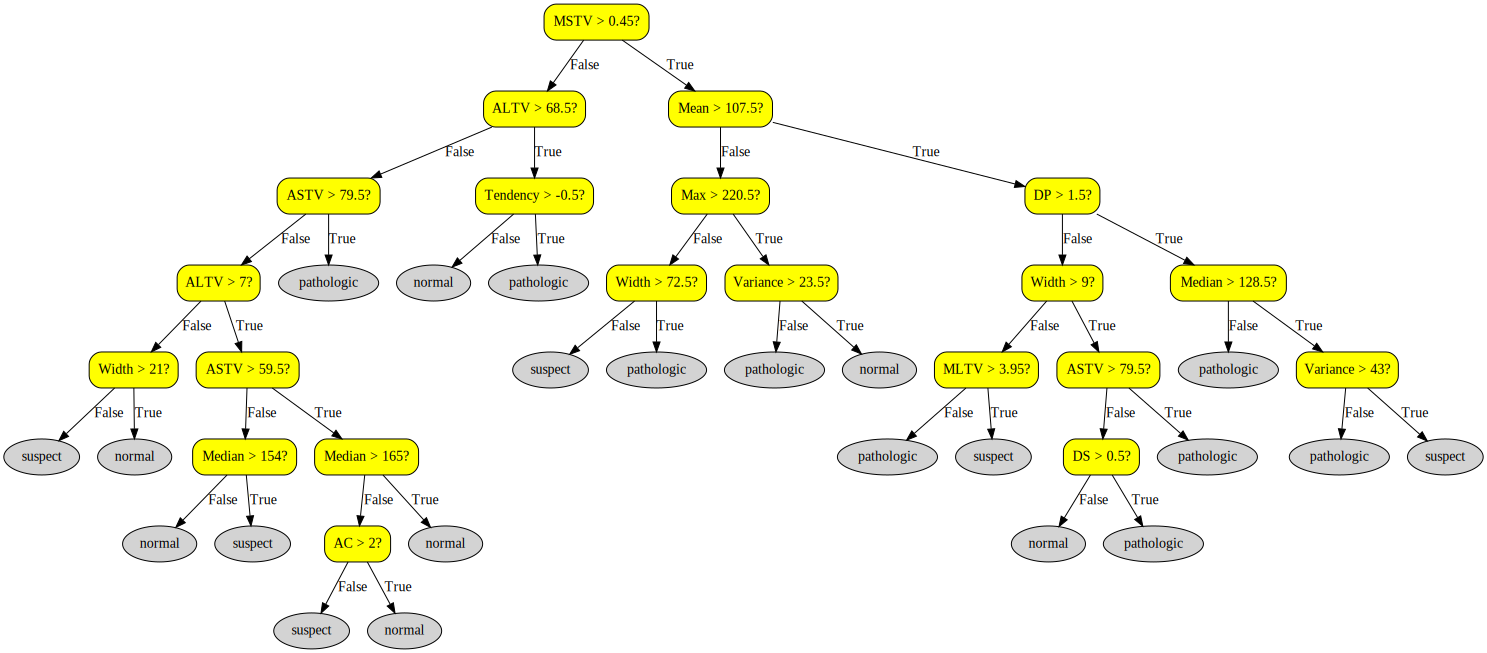

In [ ]:
cls = TreeClassifier(max_depth=7)
cls.fit(Xtrain, Ytrain)
cls.draw_tree()

**COMMENT:** We selected the depth value as 7 by cross validation TreeClassifier, and the accuracy is 0.9295774647887324. Also, we took same depth for the tree visualized above. 

# Task 3: A regression example: predicting apartment prices

In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv(root+"sberbank.csv")

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00326657, 0.00286746, 0.00127864, 0.00126195, 0.00123596]),
 'score_time': array([0.00113106, 0.00044894, 0.00043368, 0.00041842, 0.00042915]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neural_network import MLPRegressor

lnr = LinearRegression()
lnr.fit(Xtrain, Ytrain)
print("LinearRegression", cross_validate(lnr, Xtrain, Ytrain, scoring='neg_mean_squared_error'))


rid = Ridge()
rid.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, rid.predict(Xtest))
print("Ridge", cross_validate(rid, Xtrain, Ytrain, scoring='neg_mean_squared_error'))

las = Lasso()
las.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, las.predict(Xtest))
print("Lasso", cross_validate(las, Xtrain, Ytrain, scoring='neg_mean_squared_error'))

dtr = DecisionTreeRegressor()
dtr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, dtr.predict(Xtest))
print("DecisionTreeRegressor", cross_validate(dtr, Xtrain, Ytrain, scoring='neg_mean_squared_error'))

rfr = RandomForestRegressor()
rfr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, rfr.predict(Xtest))
print("RandomForestRegressor", cross_validate(rfr, Xtrain, Ytrain, scoring='neg_mean_squared_error'))


gbr = GradientBoostingRegressor()
gbr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, gbr.predict(Xtest))
print("GradientBoostingRegressor", cross_validate(gbr, Xtrain, Ytrain, scoring='neg_mean_squared_error'))


mrg = MLPRegressor()
mrg.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, mrg.predict(Xtest))
print("MLPRegressor", cross_validate(mrg, Xtrain, Ytrain, scoring='neg_mean_squared_error'))


  
gbr.fit(Xtrain, Ytrain)
print("selected regression model is GradientBoostingRegressor and the evaluation is", mean_squared_error(Ytest, gbr.predict(Xtest)))



LinearRegression {'fit_time': array([0.01193142, 0.0343895 , 0.02767611, 0.01120973, 0.00957537]), 'score_time': array([0.02109218, 0.01818371, 0.00467658, 0.00506115, 0.0060451 ]), 'test_score': array([-0.30222063, -0.32537384, -0.29377903, -0.29296258, -0.29265721])}
Ridge {'fit_time': array([0.04428172, 0.02788496, 0.01888299, 0.02982616, 0.0264132 ]), 'score_time': array([0.01194239, 0.0093646 , 0.01200795, 0.00488901, 0.01106405]), 'test_score': array([-0.30222063, -0.32537046, -0.29377831, -0.29296256, -0.29265724])}
Lasso {'fit_time': array([0.03877544, 0.05378699, 0.0230844 , 0.03905559, 0.03584695]), 'score_time': array([0.01321268, 0.0161078 , 0.00556636, 0.02075315, 0.01208353]), 'test_score': array([-0.31042005, -0.29379119, -0.29803599, -0.30061325, -0.30237486])}
DecisionTreeRegressor {'fit_time': array([0.17915654, 0.15199232, 0.10361218, 0.11400151, 0.07773113]), 'score_time': array([0.00869083, 0.01559854, 0.0067718 , 0.02086711, 0.00750065]), 'test_score': array([-0.5

**COMMENT:** As an evaluation score we used mean squared error, which calculates difference between predicted and real value of label and take square of it. We chosed gradient boosting regressor because it has the smallest value of mean squared error. the evaluated mean_squared_error is 0.2714620671704748.  Gradient boosting regressor is an additive model which in each stage a tree is fitted according to negative gradient of loss function. Default loss function for gradient calculation is squared error so we used squared error as loss function. 

# Task 4: Decision trees for regression 

Step 1. Implementing the regression model

In [ ]:
from collections import Counter
from sklearn.base import BaseEstimator, RegressorMixin
class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=90, criterion='info_gain'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        # self.class_distribution = Counter(Y)
        # return self.class_distribution.most_common(1)[0][0]
        return np.mean(Y)
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        #return len(self.class_distribution) == 1
        return np.var(Y) < 0.000001
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        #low_distr = Counter()
        #high_distr = Counter(Y)
        low_distr = 0
        high_distr = 0
        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            low_distr = np.var(Y_sorted[0:i+1])
            high_distr = np.var(Y_sorted[i+1:len(Y_sorted)-1])

            # Update the frequency tables.
            # low_distr[y_i] += 1
            # high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            #score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)
            score = np.var(Y_sorted) - ((n-i-1)/n) *high_distr - ((i+1)/n)*low_distr

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point



Step 2. Sanity check

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y


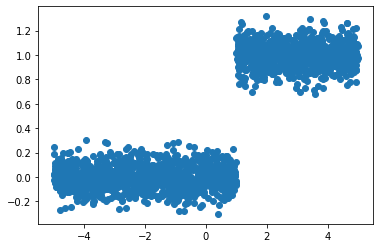

In [ ]:
x_dummy,y_dummy = make_some_data(2000)
import matplotlib.pyplot as plt
plt.scatter(x_dummy,y_dummy)

[-0.0014219136952652452, 1.0018217581892082, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, 1.0018217581892082, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, 1.0018217581892082, 1.0018217581892082, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, -0.0014219136952652452, 1.0018217581892082, -0.0014219136952652452, 1.00182

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


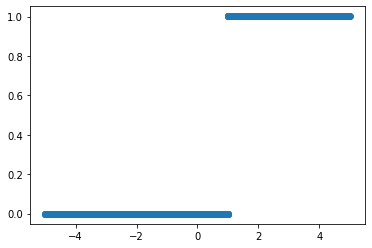

In [ ]:

cls = TreeRegressor(max_depth=1)
cls.fit(x_dummy,y_dummy)
y_predict=cls.predict(x_dummy)
plt.scatter(x_dummy,y_predict)
print(y_predict)

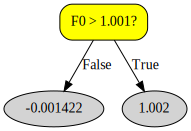

In [ ]:
cls.draw_tree()

**COMMENT:** When we look at the data generation function it is possible to see that result is almost similar to a binary output eventhough it is not 0 and 1 exactly. For this data , a tree with depth 1 would be enough to represent.

STEP 3

**COMMENT:** As a depth of tree we want to choose a value between 0 and 12 which is 5 to avoid overfitting or underfitting. We used mean squared error to evaluate our model and the error we got is 0.290. 

In [ ]:
cls2 = TreeRegressor(max_depth=5)
cls2.fit(Xtrain, Ytrain)
tmp = mean_squared_error(Ytest, cls2.predict(Xtest))
print(tmp)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.2908445777514485


STEP 4

In [ ]:
train_tmp = []
test_tmp = []
for depth in range(1,12):
  cls2 = TreeRegressor(max_depth=depth)
  cls2.fit(Xtrain, Ytrain)
  tmp = mean_squared_error(Ytest, cls2.predict(Xtest))
  tmp_train = mean_squared_error(Ytrain, cls2.predict(Xtrain))
  test_tmp.append(tmp)
  train_tmp.append(tmp_train)





/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3724: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwa

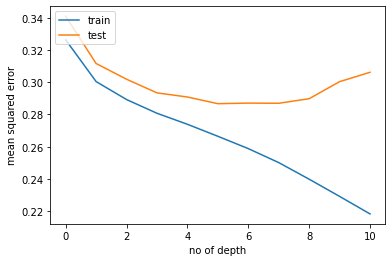

In [ ]:

plt.plot(train_tmp,label="train")
plt.plot(test_tmp,label="test")
plt.xlabel("no of depth")
plt.ylabel("mean squared error")
plt.legend(loc="upper left")

In [ ]:
print( test_tmp)
print( train_tmp)

[0.34098250711388134, 0.3116427403885958, 0.30188395972140913, 0.2934119954081052, 0.2908445777514485, 0.28670417294957007, 0.287062754434163, 0.2869578391760956, 0.2897903642367582, 0.3003799027402393, 0.3061980930062314]
[0.3263543480100574, 0.30042490282992007, 0.28927232915183554, 0.28075302267015384, 0.27391266262208824, 0.2664649987553864, 0.25880826848328425, 0.2501312961118763, 0.2398167715916042, 0.22914320485279663, 0.21826963276762515]


**COMMENT:** If we look at the graph we can see that until the depth of 5 error for both train and test decreasing where as after the depth of 5 error for train decreasing while error for test increasing. Reason for this is when depth is high our model become biased towards our training data and it losses it generability due to this error in test test increases.